원본 데이터 출처: https://github.com/PinkWink/DataScience.git

# 파이썬으로 데이터 주무르기 - 2강

##### <span style="color:red"> 2-1. 데이터 획득하기</span>
* 공공데이터포럼

##### <span style="color:red"> 2-2. pandas를 이용하여 데이터 정리하기</span>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 원래 천단위를 콤마(,)로 구분하여 표시한 데이터
# thosands 옵션을 이용하여 데이터를 불러올 때 판다스에게 알려줌
crime_anal_police = pd.read_csv('data/02. crime_in_Seoul.csv', thousands = ',',
                                encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


##### <span style="color:red"> 2-3. 지도 정보를 얻을 수 있는 Google Maps</span>

##### <span style="color:red"> 2-4. Google Maps를 이용해서 주소와 위도, 경도 정보 얻기</span>

In [3]:
import googlemaps

In [4]:
gmaps_key = '비밀이에요'
gmaps = googlemaps.Client(key=gmaps_key)

In [5]:
gmaps.geocode('서울중부경찰서', language='ko')[0]

{'address_components': [{'long_name': '２７',
   'short_name': '２７',
   'types': ['premise']},
  {'long_name': '수표로',
   'short_name': '수표로',
   'types': ['political', 'sublocality', 'sublocality_level_4']},
  {'long_name': '중구',
   'short_name': '중구',
   'types': ['political', 'sublocality', 'sublocality_level_1']},
  {'long_name': '서울특별시',
   'short_name': '서울특별시',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']},
  {'long_name': '100-032', 'short_name': '100-032', 'types': ['postal_code']}],
 'formatted_address': '대한민국 서울특별시 중구 수표로 27',
 'geometry': {'location': {'lat': 37.56361709999999, 'lng': 126.9896517},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 37.5649660802915,
    'lng': 126.9910006802915},
   'southwest': {'lat': 37.5622681197085, 'lng': 126.9883027197085}}},
 'partial_match': True,
 'place_id': 'ChIJc-9q5uSifDURLhQmr5wkXmc',
 'plus_code': {'compound_code': 'HX7Q+C

In [6]:
# 구글맵 검색을 위해 서울 XX 경찰서 형식으로 변경
station_name = []
for i in crime_anal_police['관서명']:
    station_name.append('서울'+str(i)[:-1]+'경찰서')
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [7]:
station_address = []
station_lat = []
station_lng = []

# 구글 데이터에서 주소, 위도 및 경도 정보 불러오기
for i in station_name:
    tmp = gmaps.geocode(i, language='ko')
    station_address.append(tmp[0].get('formatted_address'))
                           
    tmp_loc = tmp[0].get('geometry')
    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    
    print(i + '->' + tmp[0].get('formatted_address'))

서울중부경찰서->대한민국 서울특별시 중구 수표로 27
서울종로경찰서->대한민국 서울특별시 종로구 율곡로 46
서울남대문경찰서->대한민국 서울특별시 중구 한강대로 410
서울서대문경찰서->대한민국 서울특별시 서대문구 통일로 113
서울혜화경찰서->대한민국 서울특별시 종로구 창경궁로 112-16
서울용산경찰서->대한민국 서울특별시 용산구 백범로 329
서울성북경찰서->대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서->대한민국 서울특별시 동대문구 약령시로21길 29
서울마포경찰서->대한민국 서울특별시 마포구 마포대로 183
서울영등포경찰서->대한민국 서울특별시 영등포구 국회대로 608
서울성동경찰서->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서->대한민국 서울특별시 동작구 노량진로 148
서울광진경찰서->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서->대한민국 서울특별시 은평구 녹번동 177-15
서울강북경찰서->대한민국 서울특별시 강북구 오패산로 406
서울금천경찰서->대한민국 서울특별시 금천구 시흥대로73길 50
서울중랑경찰서->대한민국 서울특별시 중랑구 묵2동 249-2
서울강남경찰서->대한민국 서울특별시 강남구 테헤란로114길 11
서울관악경찰서->대한민국 서울특별시 관악구 관악로5길 33
서울강서경찰서->대한민국 서울특별시 강서구 화곡6동 980-27
서울강동경찰서->대한민국 서울특별시 강동구 성내로 57
서울종암경찰서->대한민국 서울특별시 성북구 화랑로7길 32
서울구로경찰서->대한민국 서울특별시 구로구 가마산로 235
서울서초경찰서->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서->대한민국 서울특별시 양천구 목동동로 99
서울송파경찰서->대한민국 서울특별시 송파구 중대로 221
서울노원경찰서->대한민국 서울특별시 노원구 노원로 283
서울방배경찰서->대한민국 서울특별시 서초구 동작대로 204
서울은평경찰서->대한민국 서울특별시 은평구 연서로 365
서울도봉경찰서->대한민국 서울특별시

In [8]:
station_address

['대한민국 서울특별시 중구 수표로 27',
 '대한민국 서울특별시 종로구 율곡로 46',
 '대한민국 서울특별시 중구 한강대로 410',
 '대한민국 서울특별시 서대문구 통일로 113',
 '대한민국 서울특별시 종로구 창경궁로 112-16',
 '대한민국 서울특별시 용산구 백범로 329',
 '대한민국 서울특별시 성북구 삼선동 보문로 170',
 '대한민국 서울특별시 동대문구 약령시로21길 29',
 '대한민국 서울특별시 마포구 마포대로 183',
 '대한민국 서울특별시 영등포구 국회대로 608',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진로 148',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 은평구 녹번동 177-15',
 '대한민국 서울특별시 강북구 오패산로 406',
 '대한민국 서울특별시 금천구 시흥대로73길 50',
 '대한민국 서울특별시 중랑구 묵2동 249-2',
 '대한민국 서울특별시 강남구 테헤란로114길 11',
 '대한민국 서울특별시 관악구 관악로5길 33',
 '대한민국 서울특별시 강서구 화곡6동 980-27',
 '대한민국 서울특별시 강동구 성내로 57',
 '대한민국 서울특별시 성북구 화랑로7길 32',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 목동동로 99',
 '대한민국 서울특별시 송파구 중대로 221',
 '대한민국 서울특별시 노원구 노원로 283',
 '대한민국 서울특별시 서초구 동작대로 204',
 '대한민국 서울특별시 은평구 연서로 365',
 '대한민국 서울특별시 도봉구 노해로 403',
 '대한민국 서울특별시 강남구 개포로 617']

In [9]:
station_lat

[37.56361709999999,
 37.575548,
 37.5547584,
 37.5647439,
 37.5719679,
 37.5387099,
 37.58977830000001,
 37.58506149999999,
 37.550814,
 37.5260441,
 37.5617303,
 37.5130866,
 37.542873,
 37.6021405,
 37.63730390000001,
 37.4568722,
 37.6056429,
 37.5094352,
 37.4743945,
 37.551284,
 37.528511,
 37.6036426,
 37.494931,
 37.4956054,
 37.5167711,
 37.5016941,
 37.6421389,
 37.4945959,
 37.6280204,
 37.6533589,
 37.49349]

In [10]:
station_lng

[126.9896517,
 126.9847471,
 126.9734981,
 126.9667705,
 126.9989574,
 126.9659183,
 127.016589,
 127.0457679,
 126.954028,
 126.9008091,
 127.0364217,
 126.9428498,
 127.083821,
 126.9213074,
 127.0273399,
 126.8970429,
 127.0764866,
 127.0669578,
 126.9513489,
 126.850038,
 127.1268224,
 127.0401328,
 126.886731,
 127.0052504,
 126.8656996,
 127.1272481,
 127.0710473,
 126.9831279,
 126.9287899,
 127.052682,
 127.0772119]

In [11]:
station_address[0].split()[2]

'중구'

In [12]:
# 구 네임 추출
gu_name = []

for i in station_address:
    tmp = i.split()
    
    tmp_gu = [a for a in tmp if a[-1] == '구'][0]
    gu_name.append(tmp_gu)
# 새로운 열 추가
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [13]:
# 금천서 찾아보기 - 2018년 기준으로 금천구로 이전해서 예외처리 할 필요 없음
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [14]:
# csv 파일로 지금까지 정리한 데이터 저장
crime_anal_police.to_csv('data/02. crime_in_Seoul_include_gu_name.csv', sep=',', encoding = 'utf-8')

In [15]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


##### <span style="color:red"> 2-5. pandas의 pivot_table 학습하기</span>
chris1610님 공개 데이터 - https://github.com/chris1610/pbpython/tree/master/data

In [16]:
df = pd.read_excel('data/02. sales-funnel.xlsx')
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


### 피벗테이블
* 많은 양의 데이터에서 필요한 자료만 뽑아 새로 표를 작성할 때 사용
* 임의대로 데이터를 정렬하고 필터링할 수 있음 <br>
(출처: https://kimdingko-world.tistory.com/214)

In [17]:
pd.pivot_table(df, index='Name')

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [18]:
# 여러 개의 인덱스를 지정할 수 있음
pd.pivot_table(df, index=['Name', 'Rep', 'Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [19]:
# 특정 value만 지정해서 나타나도록 할 수 있음
pd.pivot_table(df, index = ['Manager', 'Rep'], values=['Price'])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

* value를 pivot_table로 합치면 평균 연산이 기본값
* 합계를 구하고 싶은 경우 aggfunc 옵션을 사용하면 됨

In [20]:
pd.pivot_table(df, index=['Manager', 'Rep'], values = ['Price'], aggfunc=np.sum)
# sum을 해도 np.sum과 동일한 결과를 출력하지만, np.sum의 컴파일 속도가 더 빠름

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [21]:
pd.pivot_table(df, index = ['Manager', 'Rep', 'Product'], 
               values = ['Price', 'Quantity'], aggfunc=[np.sum, np.mean],
              fill_value = 0, # NaN 값이 나오면 0으로 채워주는 옵션
              margins = True) # 컬럼의 합을 구해줌

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706

##### <span style="color:red"> 2-6. Pivot_table을 이용해서 데이터 정리하기</span>

In [22]:
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv',
                           encoding = 'utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [23]:
# index 수정
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv',
                           encoding = 'utf-8', index_col=0)
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [24]:
# 구별로 데이터 확인하기
crime_anal = pd.pivot_table(crime_anal_raw, index = '구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [25]:
# 검거율 계산하기
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생'] * 100

In [26]:
# 필요없는 데이터 (강간 ~ 폭력 검거  삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

In [27]:
# 데이터 확인
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [28]:
# 검거율이 100 초과인 경우, 100으로 처리
col_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for i in col_list:
    crime_anal.loc[crime_anal[i] > 100, i] = 100 
    # 행 값이 100 초과이면서, col_list에 속하는 열인 경우의 데이터를 100으로 변경
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [29]:
# 강간 발생 -> 강간 등으로 '발생' 단어를 삭제 (기존 열 이름을 수정)
crime_anal.rename(columns = {'강간 발생' : '강간',
                            '강도 발생' : '강도',
                            '살인 발생' : '살인',
                            '절도 발생' : '절도',
                            '폭력 발생' : '폭력'}, inplace = True) # 원본에 반영

crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


##### <span style="color:red"> 2-7. Pivot_table을 이용해서 데이터 정리하기</span>

In [30]:
from sklearn import preprocessing
# 정규화하기 위해 sklearn 임포트

col = ['강간', '강도', '살인', '절도', '폭력']

# crime_anal에서 col에 해당하는 열의 값을 불러와 x에 지정
x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler() # 스케일러 지정

x_scaled = min_max_scaler.fit_transform(x.astype(float)) # 스케일러 적합 및 데이터 변환
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index) # 데이터 프레임화

In [31]:
# 정규화한 데이터가 들어있는 crime_anal_norm에 강간검거율 ~ 폭력검거율 데이터 붙이기
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [32]:
result_CCTV = pd.read_csv('data/01. CCTV_result.csv', encoding = 'utf-8', index_col='구별')
result_CCTV.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [33]:
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수','소계']] # crime_anal_norm에 새로운 컬럼 생성
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [34]:
# 발생건수의 합을 기반으로 범죄 컬럼 생성
col = ['강간', '강도', '살인', '절도', '폭력']

crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [35]:
# 검거율의 합을 기반으로 검거 컬럼 생성
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


##### <span style="color:red"> 2-8. 좀 더 편리한 시각화 도구 - Seaborn</span>

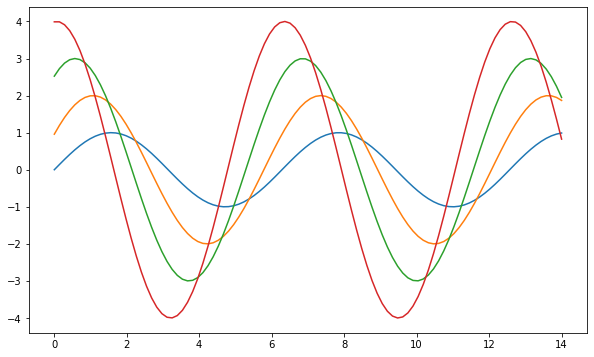

In [36]:
import warnings
warnings.simplefilter(action = 'ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

x = np.linspace(0, 14, 100) # 숫자를 균일한 간격으로 채울 수 있는 함수 - linspace(구간 시작점, 구간 끝점, 구간 내 숫자 개수)
y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 3 * np.sin(x+1.0)
y4 = 4 * np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

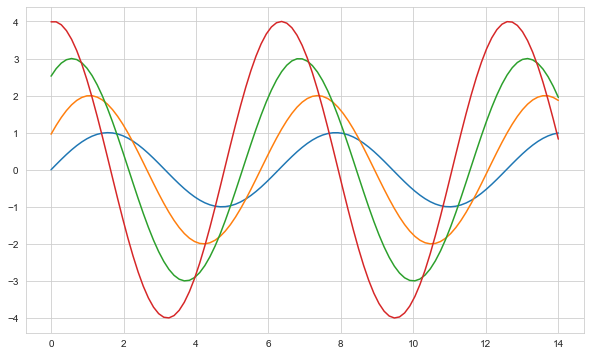

In [37]:
sns.set_style('whitegrid') 
# set_style: background color, grid, spine, tick을 정의하여 그림의 전반적인 모양을 스타일링
# white, dark, whitegrid, darkgrid, ticks 이 있음

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

In [38]:
# 연습용 데이터셋 Tips 보유
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


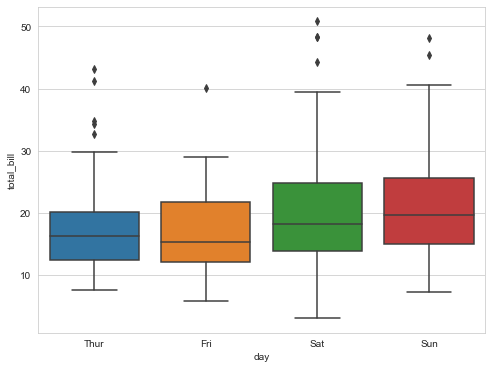

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips)
plt.show()

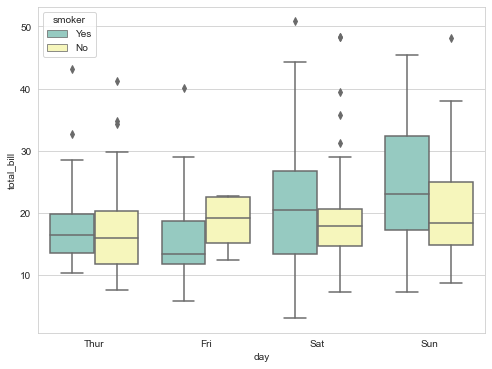

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', hue = 'smoker', data=tips, palette='Set3') # hue 구분하여 볼 수 있음 / palette 색상 변경
plt.show()

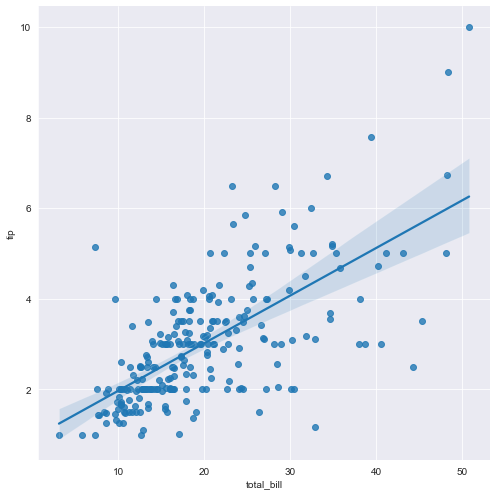

In [41]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', data=tips, size=7) # columns 간의 선형관계를 확인하기에 용이한 차트
plt.show()

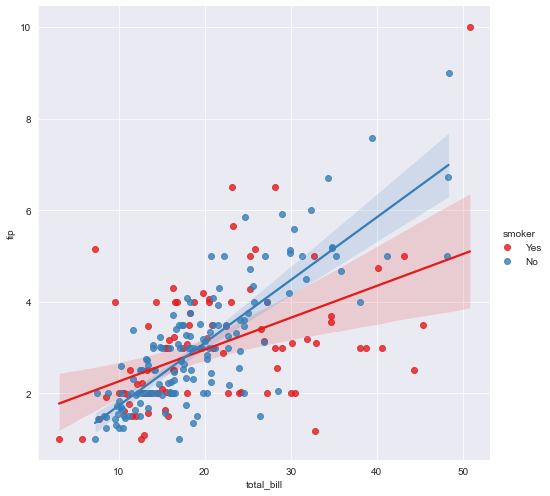

In [42]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, palette='Set1', size=7) # columns 간의 선형관계를 확인하기에 용이한 차트
plt.show()

In [43]:
# 연습용 데이터셋 flights
flights = sns.load_dataset('flights') 
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [44]:
flights = flights.pivot('month', 'year', 'passengers') 
# 데이터의 열을 기준으로 피벗테이블로 변환시키는 메서드  - DataFrame.pivot(index, columns, values)
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


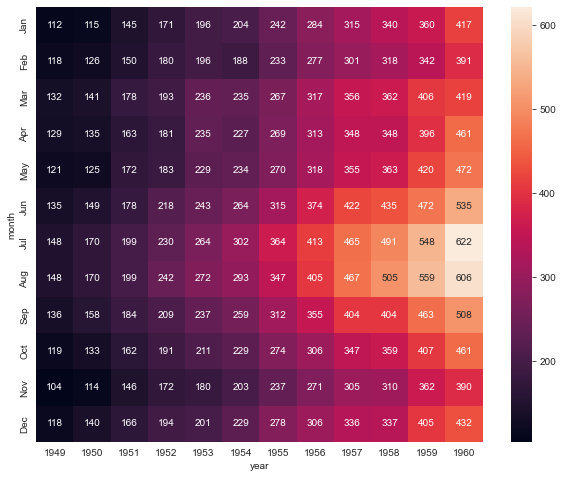

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d') # annot 각 셀의 값 표기 여부 / fmt 그 값의 데이터 타입 설정
plt.show()

In [46]:
# 연습용 데이터셋 iris
sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


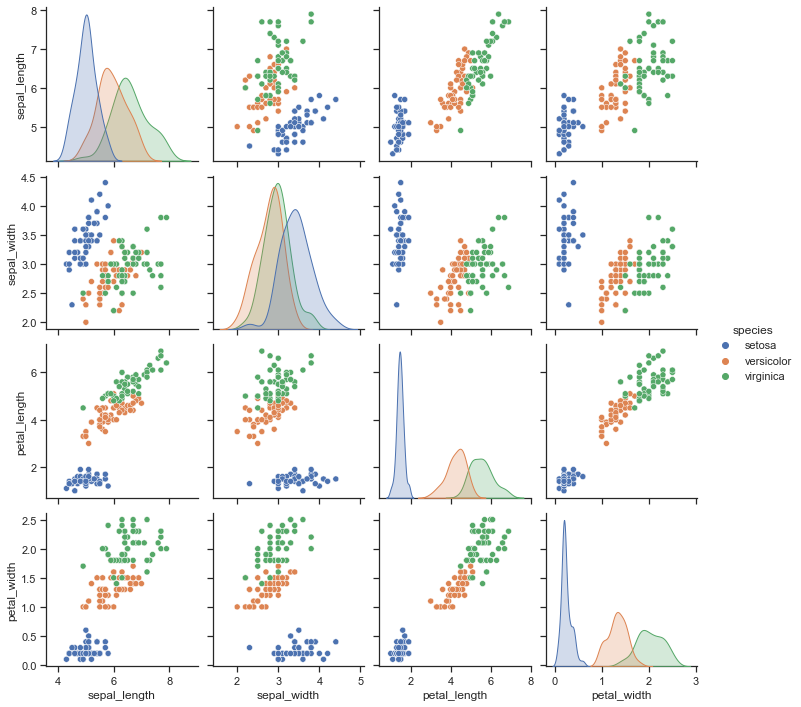

In [47]:
sns.pairplot(iris, hue='species')
plt.show()

##### <span style="color:red"> 2-9. 범죄 데이터 시각화하기</span>

In [48]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

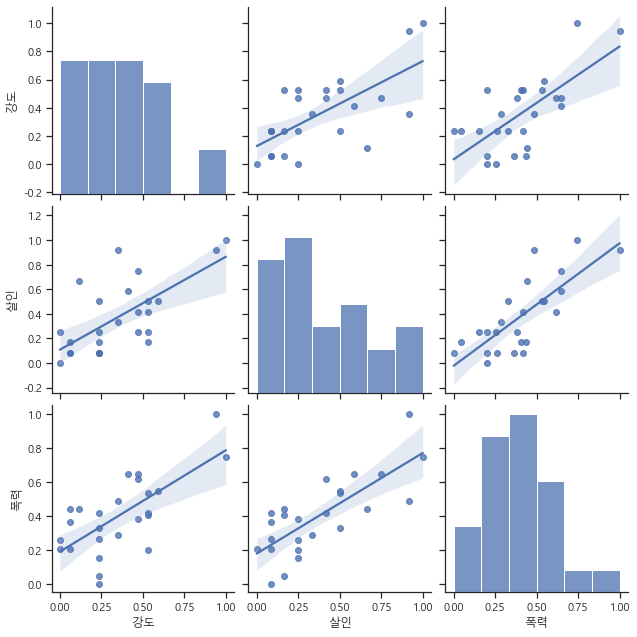

In [49]:
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', size = 3)
plt.show()

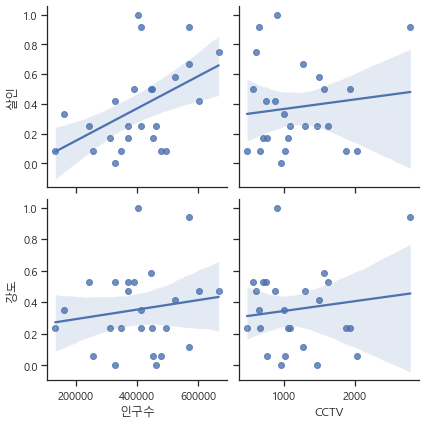

In [50]:
sns.pairplot(crime_anal_norm, x_vars = ['인구수', 'CCTV'], y_vars = ['살인', '강도'], kind = 'reg', size = 3)
plt.show()

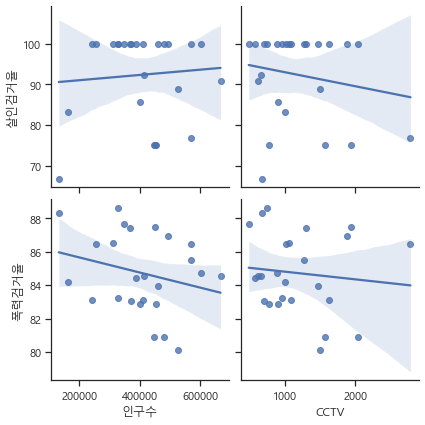

In [51]:
sns.pairplot(crime_anal_norm, x_vars = ['인구수', 'CCTV'], y_vars = ['살인검거율', '폭력검거율'], kind = 'reg', size = 3)
plt.show()

In [52]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100 # 최댓값을 100으로 한정
crime_anal_norm_sort = crime_anal_norm.sort_values(by = '검거', ascending = False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


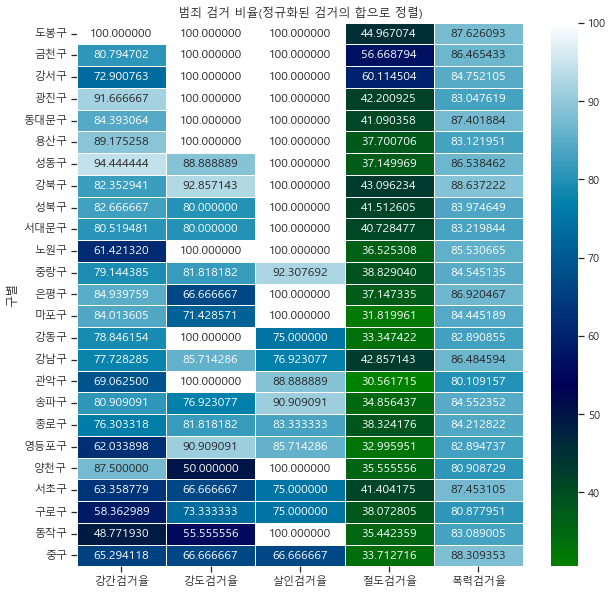

In [53]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap = 'ocean')
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

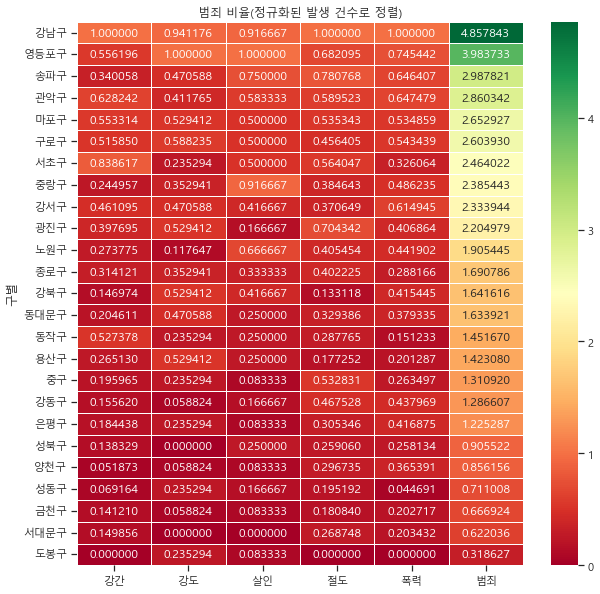

In [54]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm_sort['범죄'] = crime_anal_norm_sort['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by = '범죄', ascending = False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5, cmap = 'RdYlGn')
plt.title('범죄 비율(정규화된 발생 건수로 정렬)')
plt.show()

In [55]:
crime_anal_norm.to_csv('data/02. crime_in_Seoul_final.csv', sep = ',', encoding = 'utf-8')